<a href="https://colab.research.google.com/github/sethhardik/SHALA2020/blob/master/DS_L2_17_Apr_Assignment_2_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Assignment - 2: Basic Data Understanding**

---

This assignment will get you familiarized with Python libraries and  functions required for data visualization.

---
## Part 1 - Loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

In [1]:
# Load the four libraries with their aliases 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```df``` and ```movies``` respectively. 
* Print the first ten rows of ```df```. 



In [0]:
# Load the file as a dataframe 
df = pd.read_csv("train.csv")
movies=pd.read_csv("moviesData.csv")

In [3]:
# Print the first ten rows of df
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,5
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,6
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,7
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,9


### Using the dataframe ```df```, perform the following: 

* Print the first five rows of the column ```MonthlyRate```. 
* Find out the details of the column ```MonthlyRate``` like mean, maximum value, minimum value, etc. 

In [4]:
# Print the first five rows of MonthlyRate
print(df["MonthlyRate"].head())

0    19479
1    24907
2     2396
3    23159
4    16632
Name: MonthlyRate, dtype: int64


In [5]:
# Find the details of MonthlyRate 
# all the details of the column like count mean , max, min, std with online of code
df["MonthlyRate"].describe()

count     1028.000000
mean     14243.531128
std       7048.768076
min       2094.000000
25%       8259.750000
50%      14074.500000
75%      20342.250000
max      26999.000000
Name: MonthlyRate, dtype: float64

---
## Part 2 - Cleaning and manipulating data 
---

### Using the dataframe ```df```, peform the following:

* Check whether there are any missing values in ```df```. 
* If yes, drop those values and print the size of ```df``` after dropping these. 

In [6]:
print("Size of data before removing NAN:",df.shape)
# Check for missing values 
if(df.isnull().sum().sum()!=0):
  # Drop the missing values 
  df=df.dropna()
# Print the size of df after dropping 
print("Size of data after removing NAN:",df.shape)

Size of data before removing NAN: (1028, 34)
Size of data after removing NAN: (1028, 34)


### Using the dataframe ```df```, peform the following:

* Add another column named ```MonthRateNew``` in ```df``` by subtracting the mean from ```MonthlyRate``` and dividing it by standard deviation. 

In [7]:
# Add a column named MonthRateNew 
add_df = (df["MonthlyRate"]-df["MonthlyRate"].mean())/(df["MonthlyRate"].std())
df.insert(34, "MonthRateNew", add_df, allow_duplicates=True) 
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID,MonthRateNew
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0,0.742749
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1,1.512813
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2,-1.680795
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3,1.264827
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4,0.338849


### Using the dataframe ```movies```, perform the following: 

* Check whether there are any missing values in ```movies```. 
* Find out the number of observations/rows having any of their features/columns missing. 
* Drop the missing values and print the size of ```movies``` after dropping these. 
* Instead of dropping the missing values, replace the missing values by their mean (or some suitable value). 


In [8]:
# Check for missing values 
print("Total number of NUll values in the dataset",movies.isnull().sum().sum())
print("Shape of dataset before removing null:",movies.shape)

# Drop the missing values 
movies_remove_null=movies.dropna()
print("Shape of dataset after removing null:",movies_remove_null.shape)

# Replace the missing values 

movies_replace_null=movies.fillna(movies.mean())
print("Total number of NAN  in dataset now ( mean value fill):",movies_replace_null.isnull().sum())
# in datatset not all rows are integer or float some are string also therefore the mean cannot be taken 

movies_remove_null_again=movies.fillna(method="ffill")    # forward fill method to the values of NAN
print("Total number of NAN  in dataset now (forward fill):",movies_remove_null_again.isnull().sum().sum())


Total number of NUll values in the dataset 73
Shape of dataset before removing null: (600, 31)
Shape of dataset after removing null: (572, 31)
Total number of NAN  in dataset now ( mean value fill): Unnamed: 0           0
title                0
title_type           0
genre                0
runtime              0
mpaa_rating          0
studio               5
thtr_rel_year        0
thtr_rel_month       0
thtr_rel_day         0
dvd_rel_year         0
dvd_rel_month        0
dvd_rel_day          0
imdb_rating          0
imdb_num_votes       0
critics_rating       0
critics_score        0
audience_rating      0
audience_score       0
best_pic_nom         0
best_pic_win         0
best_actor_win       0
best_actress_win     0
best_dir_win         0
top200_box           0
director             2
actor1               2
actor2               7
actor3               9
actor4              12
actor5              14
dtype: int64
Total number of NAN  in dataset now (forward fill): 0


---
## Part 3 - Visualizing data 
---

### Visualize the ```df``` by drawing the following plots:

* Plot a histogram of ```Age``` and find the range in which most people are there. 
* Modify the histogram of ```Age``` by adding 30 bins. 
* Draw a scatter plot between ```Age``` and ```Attrition``` and suitable labels to the axes. Find out whether people more than 50 years are more likely to leave the company. (```Attrition``` = 1 means people have left the company). 

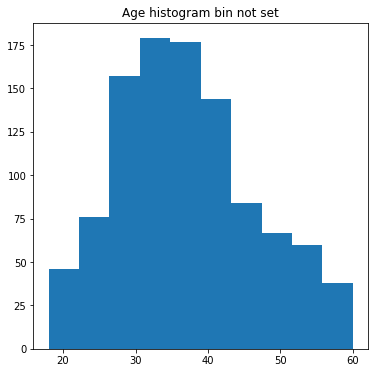

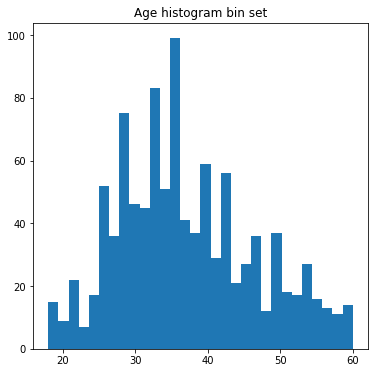

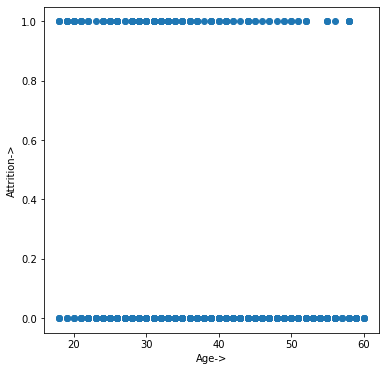

Clearly from the Scattered plot we can see that people above the age of 50 has less Attrition that is they are less likely to leave the job.


In [9]:
# Plot and modify the histogram of Age
plt.figure(figsize=(6,6))
plt.hist(df["Age"])
plt.title("Age histogram bin not set")
plt.show()

plt.figure(figsize=(6,6))
plt.hist(df["Age"],bins=30)
plt.title("Age histogram bin set")
plt.show()

# Draw a scatter plot between Age and Attrition
plt.figure(figsize=(6,6))
plt.scatter(df["Age"],df["Attrition"])
plt.xlabel("Age->")
plt.ylabel("Attrition->")
plt.show()
print("Clearly from the Scattered plot we can see that people above the age of 50 has less Attrition that is they are less likely to leave the job.")


### Visualize the ```df``` by following the steps given below:

* Get a series containing counts of unique values of ```Attrition```.
* Draw a countplot for ```Attrition``` using ```sns.countplot()```. 

count of unique values in the df.attrition:
 0    856
1    172
Name: Attrition, dtype: int64


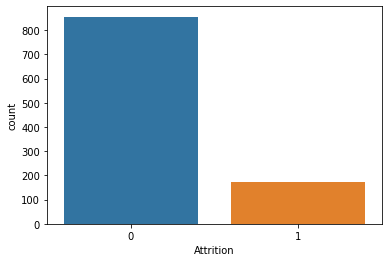

In [10]:
# Get a series of counts of values of Attrition
print("count of unique values in the df.attrition:\n",df["Attrition"].value_counts(dropna=False))
# Draw a countplot for Attrition 
# You may use countplot of seaborn for this 
sns.countplot(df["Attrition"])
plt.show()


### Visualize the ```df``` by following the steps given below:

* Draw a cross tabulation of ```Attrition``` and ```BusinessTravel``` as bar charts. Find which value of ```BusinessTravel``` has highest number of people.

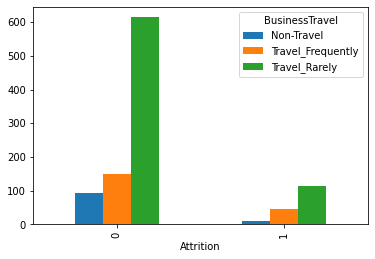


Travel_Rarely has highest number of people.


In [11]:
# Draw a cross tab of Attrition and BusinessTravel 
# You may use crosstab of pandas for this 
cross=pd.crosstab(df["Attrition"],df["BusinessTravel"])
cross.plot.bar()
plt.show()
print("\nTravel_Rarely has highest number of people.")

### Visualize the ```df``` by drawing the following plot:

* Draw a stacked bar chart between ```Attrition``` and ```Gender``` columns. 

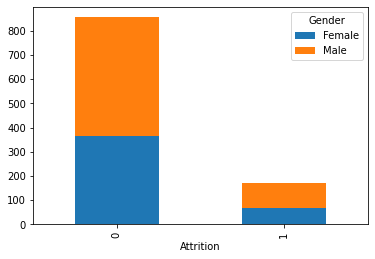

In [12]:
# Draw a stacked bar chart between Attrition and Gender 
cross2=pd.crosstab(df["Attrition"],df["Gender"])
cross2.plot.bar(stacked=True)
plt.show()


### Visualize the ```df``` by drawing the following histogram:

* Draw a histogram of ```TotalWorkingYears``` with 30 bins. 
* Draw a histogram of ```YearsAtCompany``` with 30 bins and find whether the values in ```YearsAtCompany``` are skewed. 

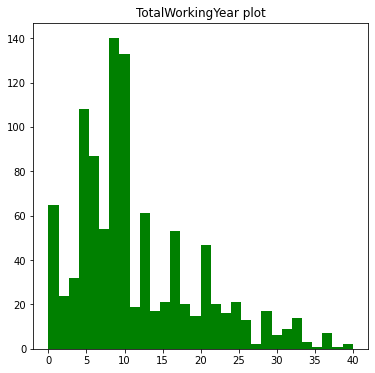

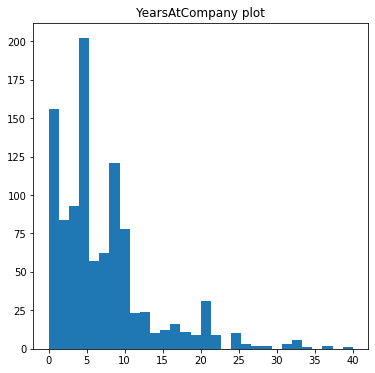

Clearly from the plot YearsAtCompany is positive Skewed and value of skew is : 1.7724925350968725


In [13]:
# Draw a histogram of TotalWorkingYears with 30 bins
plt.figure(figsize=(6,6))
plt.hist(df["TotalWorkingYears"],bins=30,color="green")
plt.title("TotalWorkingYear plot")
plt.show()

# Draw a histogram of YearsAtCompany
plt.figure(figsize=(6,6))
plt.hist(df["YearsAtCompany"],bins=30)
plt.title("YearsAtCompany plot")
plt.show()
print("Clearly from the plot YearsAtCompany is positive Skewed and value of skew is :",df["YearsAtCompany"].skew(skipna=True))

### Visualize the ```df``` by drawing the following boxplot:

* Draw a boxplot of ```MonthlyIncome``` for each ```Department``` and report whether there is/are outlier(s). 


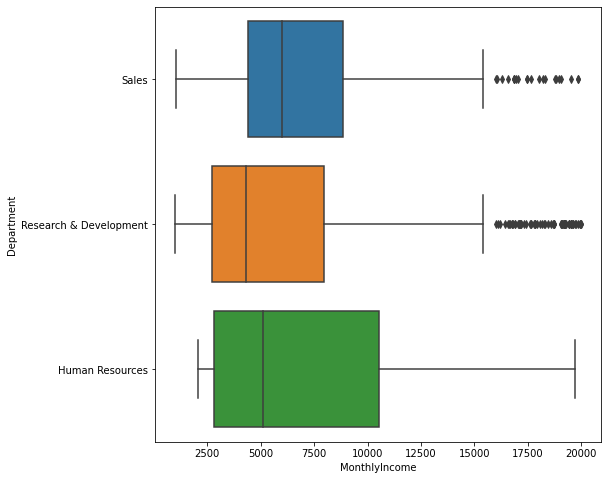


There are ouliers in both Sales and Research & Development Department


In [14]:
# Draw a boxplot of MonthlyIncome for each Department and report outliers 
plt.figure(figsize=(8,8))
sns.boxplot("MonthlyIncome","Department",data=df)
plt.show()
print("\nThere are ouliers in both Sales and Research & Development Department")

### Visualize the ```df``` by drawing the following piechart:

* Create a pie chart of the values in ```JobRole``` with suitable label and report which role has highest number of persons. 

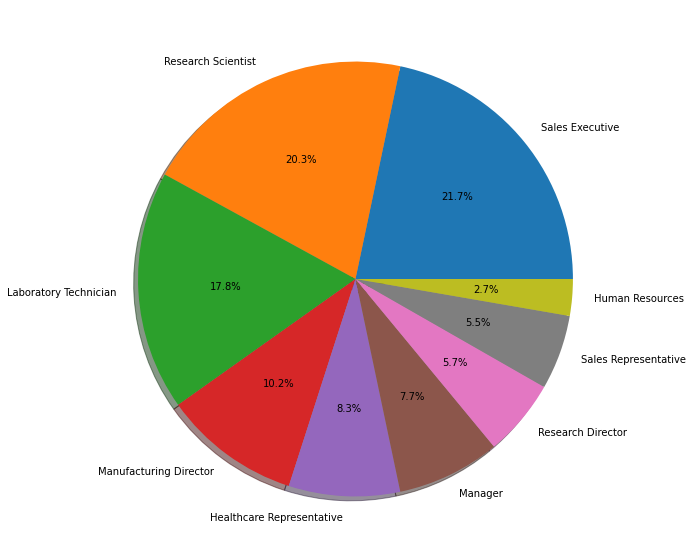


clearly from Pie Chart Sales Executive has highest number of persons


In [15]:
# Create a piechart of JobRole 
# You will need to find the counts of unique values in JobRole. 
count=df["JobRole"].value_counts()   # count values of each job

plt.figure(figsize=(10,10))   # to make pie chart bigger and neat 
plt.pie(count,labels=count.index.tolist(),autopct='%1.1f%%',shadow=True)
plt.show()
print("\nclearly from Pie Chart Sales Executive has highest number of persons")
